# Building a dataset
Not much to write about here. One thing to admit is that I seem to have not saved the results of the first successfull run of this notebook and when I repeated the run, I realized not all random state initializers were set. And they still aren't. The results are therefore slightly different than the first time. The newly trained model was saved under a different name so now there are two of them in the root of the repository.

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sns.set(rc={'figure.dpi': 72, 'savefig.dpi': 72})
sns.set_context('notebook')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.math import confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [2]:
print(tf.__version__)

2.6.0


In [3]:
!nvidia-smi

Mon Dec 20 08:30:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.91.03    Driver Version: 460.91.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GT 730      On   | 00000000:01:00.0 N/A |                  N/A |
| N/A   52C    P0    N/A /  N/A |    422MiB /  2000MiB |     N/A      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
tf.config.list_physical_devices()

2021-12-20 08:30:18.368906: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 08:30:18.511879: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 08:30:18.512512: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
with open(os.path.join('..', 'dataset', 'math_dataset_md_1.0.pkl'), 'rb') as file:
    dataset = pickle.load(file)

X, y = dataset[0].astype(float).reshape(-1, 28, 28, 1) / 255, dataset[1]

print(f'{X.shape = }')
print(f'{y.shape = }')

X.shape = (120016, 28, 28, 1)
y.shape = (120016,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)

In [7]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(16, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               5

2021-12-20 08:30:19.505527: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-20 08:30:19.506011: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 08:30:19.506353: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-20 08:30:19.506889: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=3,
)

history_df = pd.DataFrame(history.history) 

2021-12-20 08:30:20.806932: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3


2021-12-20 08:30:21.902593: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201


118/118 [==============================] - 51s 385ms/step - loss: 0.3992 - accuracy: 0.8865 - val_loss: 0.0232 - val_accuracy: 0.9935
Epoch 2/3
118/118 [==============================] - 43s 365ms/step - loss: 0.0371 - accuracy: 0.9890 - val_loss: 0.0095 - val_accuracy: 0.9967
Epoch 3/3
118/118 [==============================] - 43s 368ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0058 - val_accuracy: 0.9981


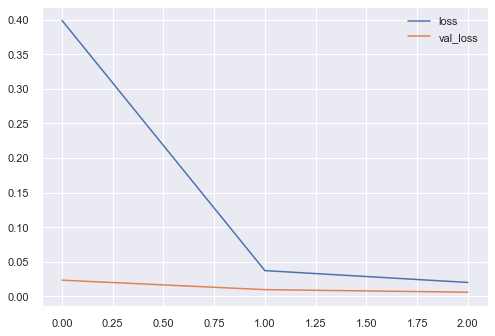

In [9]:
_ = history_df[['loss', 'val_loss']].plot()

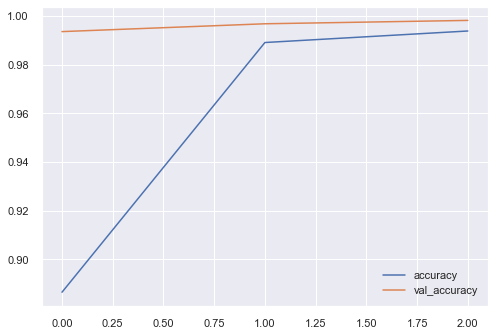

In [10]:
_ = history_df[['accuracy', 'val_accuracy']].plot()

### Note!
It is not a typical situation for the validation accuracy to be higher than training accuracy and vice versa for loss. Overfitting would result in a reversed situation. This also happened the first time I trained the model. Technically there was no data leakage in the process. However, maybe there is too much similarity between many samples in the dataset. How "similar" is too similar, it is difficult to tell. Maybe drastically reducing the size of the training set, to the point that both accuracies start dropping, would set this issue straight.

In [11]:
model.evaluate(X_test, y_test)

1876/1876 [==============================] - 24s 13ms/step - loss: 0.0058 - accuracy: 0.9981


[0.005787726957350969, 0.9981169104576111]

In [12]:
y_predicted = model.predict(X_test)
y_predicted = [np.argmax(val) for val in y_predicted]
cmat = confusion_matrix(predictions=y_predicted, labels=y_test)

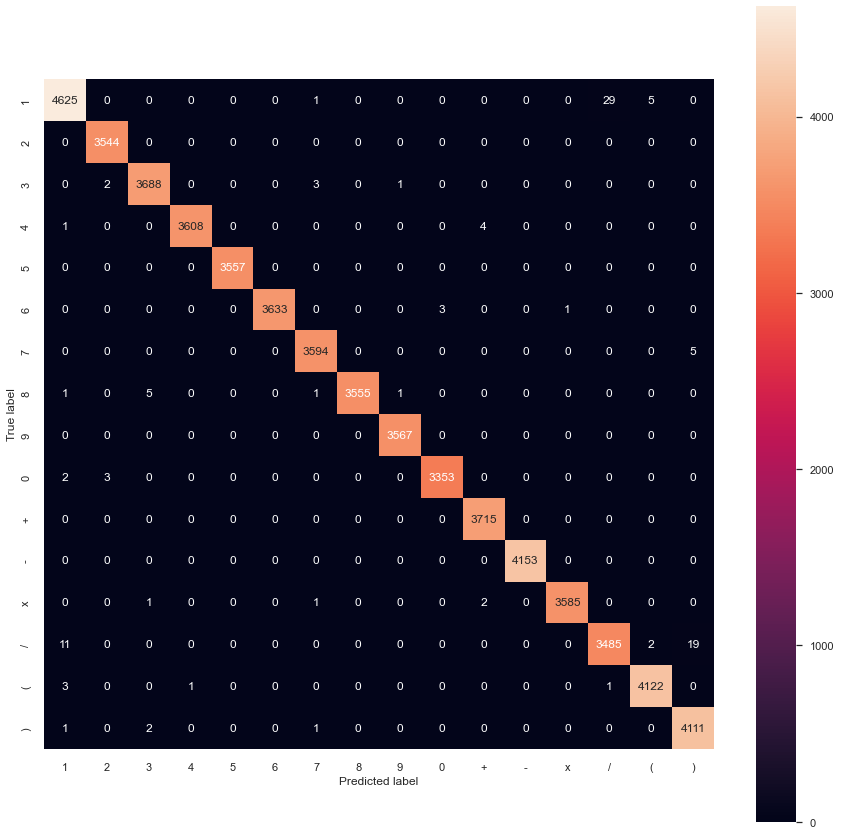

In [13]:
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '+', '-', 'x', '/', '(', ')']

plt.figure(figsize=(15, 15))
_ = sns.heatmap(cmat, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Confusion matrix
This confirms all reasonable expectations regarding which classes of characters would likely confuse the classifier. The relative number of false predictions is negligible but with only 4 styles of "handwriting" in the dataset it is also reasonable to expect for the model not to perform as good in the wild.

In [14]:
model.save('../pm_model2_md.h5')